# Multi Armed Bandit

## O que é? 

Multi Armed Bandit (MaB) é uma técnica de aprendizado de máquina que visa maximizar os resultados baseado nas recompensas recebidas durante o experimento.

Para entender melhor o funcionamento do MaB, precisamos saber sua composição:
- **Agente**: O orquestrador das ações.
- **Estado:** São os resultados obtidos por cada banner no momento.
- **Ação:** É a escolha feita pelo Agente de acordo com o Estado do experimento, a tomada de decisão.
    - **Explore:** A ação de Explore tem o objetivo de conhecer melhor o ambiente ou identificar mudanças de comportamento dos usuários.<br>
    - **Exploit:** A ação de Exploit tem o objetivo de eplorar a ação que tem trazido o melhor retorno de acordo com o objetivo.
- **Estratégia:** É o racional de como o Agente vai definir qual é a melhor ação para o presente momento.
- **Recompensa:** Sempre que uma ação atinge algum objetivo, ela recebe alguma recompensa.

Basicamente o MaB vai atuar como um **gerenciador do tráfego do App ou Site**, guiando os usuários para os fluxos que vão te deixar mais próxmo do objetivo definido equilibrando ações de Explore e Exploit aprendidos ao longo do processo do experimento.<br><br>

## Estratégias

### Random

Assim como nos testes A/B, é as ações são escolhidas de forma randômica. Sempre executando ações de **Explore** e nunca **Exploit**. Tomando a decisão de qual é a ação que mais trouxe recompensas somente ao final do experimento.
Aliás, [aqui](https://medium.com/itau-data/multi-armed-bandits-uma-alternativa-para-testes-a-b-d5db47d24006) tem um artigo bem legal comparando o MaB com os testes A/B.



### Greedy

É o contrárido da anterior, a estratégia aqui é sempre escolher a ação que trouxe mais reconpensas. Sempre executando ações de **Exploit** e nunca **Explore**. A decisão de qual é a ação que trouxe maior retorno para o experimento é feita logo no início do experimento, logo quando a primeira recompensa é conquistada.

### EpsilonGreedy

É o meio termo das opções anteriores, onde é definido um valor **ε** para reservar parte do tráfego para as ações de **Explore**. Por exemplo, sabendo que `ε = 0.1`, logo 10% das iterações feitas pelo Agente será reservadas para a Explore e os outros 90% para o Exploit. Aqui a definição de qual é a ação que traz o maior retorno pode variar com o tempo do experimento, já que ele está sempre explorando as outras ações.

### UCB - Upper Confidence Bound

A estratégia UCB não possui valores de **Explore** e **Exploit** pré-definidos, ela parte do princípio de que todas as ações devem ser testadas para que seja possível definir qual delas é a melhor. Para isso, é levado em conta dois fatores: 
 - **Valor estimado da ação:** É basicamente o quanto o Agente espera que a ação vá gerar uma recompensa. Quanto mais recompensa a ação gerar, maior será o valor dela.
 - **Incerteza da ação:** A ação que foi menos escolhida é a que o Agente menos conhece, logo maior será a incerteza quanto aos seus resultados. 

Aqui, ao longo do experimento, tende a ser executada mais vezes a ação com maior retorno **(Exploit)**. Mas a incerteza não permite o Agente de esquecer das outras ações, forçando-o a testar de tempos em tempos **(Explore)**.

<br>

## Mãos à obra:

Imagine o seguinte problema:
> Você possui um aplicativo e quer adicionar um banner para divulgar alguma ação promocional de um de seus produtos com o objetivo de **maximizar as vendas**.
Sua equipe elabora **5** banners diferentes. Qual banner vai trazer uma melhor performance de vendas?

Este é um problema que o MaB tenta resolver.

O fluxo funcionaria dessa maneira:<br> 

Após a chegada de um novo usuário no App, o **Agente** irá analisar o **Estado** do experimento e, de acordo com a **Estratégia** definida, irá realizar a **Ação** para direcioná-lo ao banner mais indicado, podendo gerar alguma recompensa ou não.<br>
As primeiras iterações vão ser sempre de **Explore**, já que não há conhecimento prévio de qual banner tem a melhor performance de acordo com o objetivo definido. Então o **Agente** irá escolher o banner de forma randômica até que se tenha algum conhecimento sobre suas conversões.   
Ao passar do tempo, com a chegada de novos usuários, o **Agente** tende a escolher o banner que trouxe para ele mais recompensas **(Exploit)** mas sem deixar de explorar outros banners para entender melhor o ambiente ou alguma possível mudança de comportamento, causada por alguma sazonalidade ou nova tendencia.

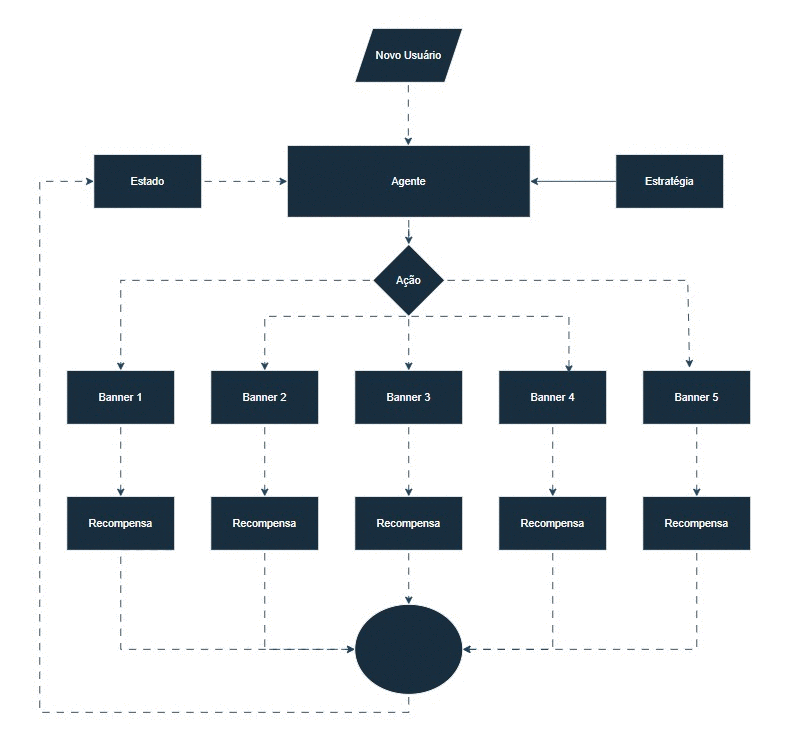

In [1]:
from IPython.display import Image
Image(filename="GIF_MaB.gif")

<br>

<br>

In [2]:
import numpy as np
import pandas as pd
from arm import Arm
from bandit import Bandit
from strategy import EpsilonGreedyStrategy, GreedyStrategy, RandomStrategy, UCB


### Strategy

In [3]:
egreedy = EpsilonGreedyStrategy(epsilon=0.1)
greedy = GreedyStrategy()
random = RandomStrategy()
upper_bound = UCB()

### Bandit

In [4]:
egreedy_bandit = Bandit(strategy=egreedy)
greedy_bandit = Bandit(strategy=greedy)
random_bandit = Bandit(strategy=random)
ucb_bandit = Bandit(strategy=upper_bound)

bandits = [egreedy_bandit, greedy_bandit, random_bandit, ucb_bandit]

### Arms

In [5]:
tela_1 = Arm(name="tela_1", click_prob=0.1, purchase_prob=0.15)
tela_2 = Arm(name="tela_2", click_prob=0.25, purchase_prob=0.08)
tela_3 = Arm(name="tela_3", click_prob=0.15, purchase_prob=0.1)
tela_4 = Arm(name="tela_4", click_prob=0.2, purchase_prob=0.06)


arms = [tela_1,tela_2,tela_3,tela_4]

In [6]:
for bandit in bandits:
    for arm in arms:
        bandit.add_arm(arm)

### Play

In [7]:
def get_arm_total_reward(arms):
    list_of_total_rewards = []
    for arm in arms:
        list_of_total_rewards.append(arm.total_reward)
        
        
    return list_of_total_rewards

In [8]:
def play(bandit,number_of_steps):
    for step in range(number_of_steps):
        bandit.play()
        rewards = get_arm_total_reward(bandit.arms)
        arms_rewards.append(rewards)
    for arm in bandit.arms:
        print(arm.summary())

In [9]:
def play_x_epochs(bandit, number_of_steps, number_of_epochs):
    
    best_arm_list = []
    best_arm_summary_list = [] 
    total_reward_list = []
    
    for epoch in range(number_of_epochs):
        
        play(bandit,number_of_steps)
        best_arm = bandit.get_best_arm()
        total_reward = bandit.get_total_reward()
        
        best_arm_list.append(best_arm.name)
        best_arm_summary_list.append(best_arm.summary())
        total_reward_list.append(total_reward)
        
        bandit.reset_arms()
        
        data = {'tela': best_arm_list, 'details': best_arm_summary_list, 'total_reward': total_reward_list}
        
        df = pd.DataFrame(data = data)

        
    return df


In [10]:
arms_rewards = []

In [11]:
number_of_steps = 10000

In [12]:
ucb_bandit.reset_arms()

In [13]:
df = play_x_epochs(ucb_bandit, number_of_steps, 10)

tela_1 - total rewards: 236 - Mean Rewards: 0.34553440702781846
tela_2 - total rewards: 3340 - Mean Rewards: 0.5088360755636807
tela_3 - total rewards: 808 - Mean Rewards: 0.43628509719222464
tela_4 - total rewards: 338 - Mean Rewards: 0.3751387347391787
tela_1 - total rewards: 636 - Mean Rewards: 0.41005802707930367
tela_2 - total rewards: 2842 - Mean Rewards: 0.4897466827503016
tela_3 - total rewards: 666 - Mean Rewards: 0.413151364764268
tela_4 - total rewards: 387 - Mean Rewards: 0.3742746615087041
tela_1 - total rewards: 284 - Mean Rewards: 0.36086404066073696
tela_2 - total rewards: 3129 - Mean Rewards: 0.5097751710654936
tela_3 - total rewards: 843 - Mean Rewards: 0.44251968503937006
tela_4 - total rewards: 470 - Mean Rewards: 0.4017094017094017
tela_1 - total rewards: 356 - Mean Rewards: 0.3743427970557308
tela_2 - total rewards: 3520 - Mean Rewards: 0.5092592592592593
tela_3 - total rewards: 438 - Mean Rewards: 0.39107142857142857
tela_4 - total rewards: 388 - Mean Rewards: 0.

In [14]:
df

,tela,details,total_reward
0,tela_2,tela_2 - total rewards: 3340 - Mean Rewards: 0...,4722
1,tela_2,tela_2 - total rewards: 2842 - Mean Rewards: 0...,4531
2,tela_2,tela_2 - total rewards: 3129 - Mean Rewards: 0...,4726
3,tela_2,tela_2 - total rewards: 3520 - Mean Rewards: 0...,4702
4,tela_2,tela_2 - total rewards: 3591 - Mean Rewards: 0...,4718
5,tela_2,tela_2 - total rewards: 2324 - Mean Rewards: 0...,4505
6,tela_2,tela_2 - total rewards: 2674 - Mean Rewards: 0...,4732
7,tela_2,tela_2 - total rewards: 2713 - Mean Rewards: 0...,4529
8,tela_2,tela_2 - total rewards: 1861 - Mean Rewards: 0...,4288
9,tela_2,tela_2 - total rewards: 2322 - Mean Rewards: 0...,4555


In [15]:
play(ucb_bandit, number_of_steps)

tela_1 - total rewards: 332 - Mean Rewards: 0.36323851203501095
tela_2 - total rewards: 2540 - Mean Rewards: 0.4937791601866252
tela_3 - total rewards: 1263 - Mean Rewards: 0.45877224845622955
tela_4 - total rewards: 465 - Mean Rewards: 0.39108494533221194


In [16]:
best_arm_idx = np.argmax(ucb_bandit.arms)
ucb_bandit.arms[best_arm_idx].summary()

'tela_2 - total rewards: 2540 - Mean Rewards: 0.4937791601866252'

In [17]:
ucb_bandit.get_total_reward()

4600

In [18]:
best_arm = ucb_bandit.get_best_arm()
best_arm.summary()

'tela_2 - total rewards: 2540 - Mean Rewards: 0.4937791601866252'

### Visualization

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df = pd.DataFrame(data = arms_rewards, columns=arms)

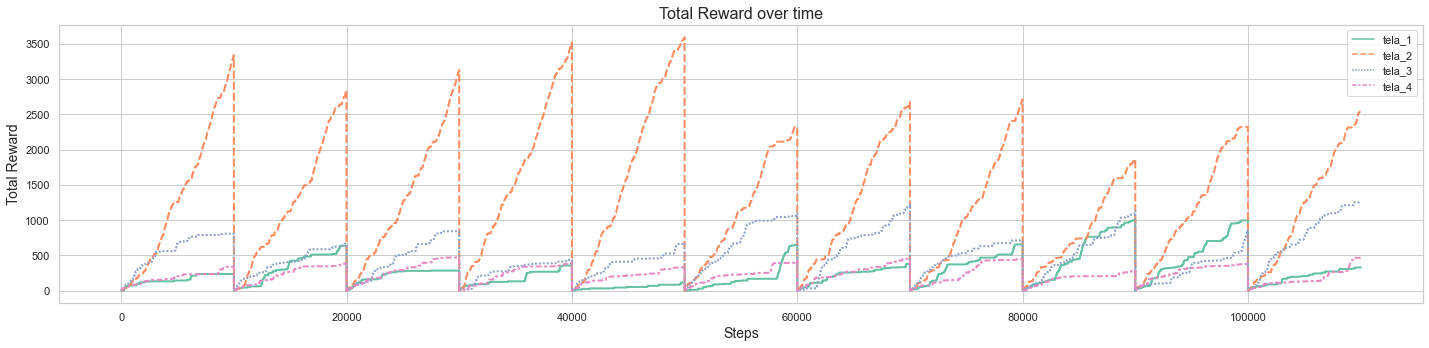

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 5))
#
plt.title('Total Reward over time', fontsize=16)
plt.xlabel('Steps', fontsize=14)
plt.ylabel('Total Reward', fontsize=14)

plt.tight_layout()
colors = sns.color_palette("Set2", df.shape[1])

sns.lineplot(data=df, palette = "Set2"  ,linestyle='-', linewidth=2);


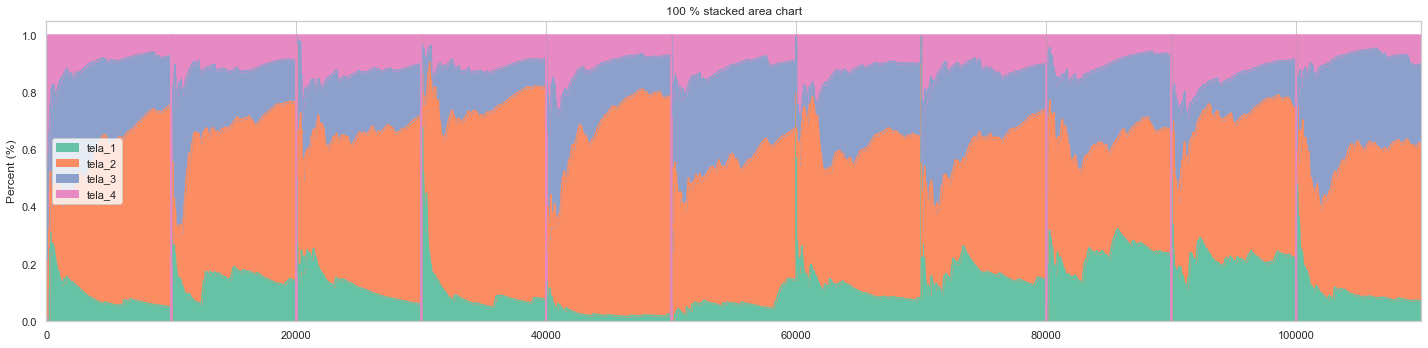

In [22]:
df_stack = df.divide(df.sum(axis=1), axis=0)
ax = df_stack.plot(kind='area', figsize=(20,5),stacked=True, title='100 % stacked area chart',color=colors )

ax.set_ylabel('Percent (%)')
ax.margins(0, 0) # Set margins to avoid "whitespace"
plt.tight_layout()
plt.show()
